<a href="https://colab.research.google.com/github/VivianeCorreia/Tech-Challenge/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [382]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_prod= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/Producao.csv", delimiter=";")
df_proc_viniferas=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaViniferas.csv", delimiter="\t")
df_proc_americanas=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaAmericanas.csv", delimiter=";")
df_proc_mesa=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaMesa.csv", delimiter=";")
df_proc_semclass=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ProcessaSemclass.csv", delimiter=";")
df_comercio= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/Comercio.csv", delimiter=";")

df_imp_vinho= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpVinhos.csv", delimiter=";")
df_imp_espumante= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpEspumantes.csv", delimiter=";")
df_imp_frescas= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpFrescas.csv", delimiter=";")
df_imp_passas= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpPassas.csv", delimiter=";")
df_imp_suco= pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ImpSuco.csv", delimiter=";")

df_exp_vinho=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpVinho.csv", delimiter=";")
df_exp_espumante=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpEspumantes.csv", delimiter=";")
df_exp_uva=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpUva.csv", delimiter=";")
df_exp_suco=pd.read_csv("https://raw.githubusercontent.com/VivianeCorreia/Tech-Challenge/main/ExpSuco.csv", delimiter=";")

# Produção de Vinho

In [383]:
df_prod_tratado = df_prod.drop(columns=["id"], axis=0)
df_prod_tratado = df_prod_tratado[:8]
df_prod_tratado.head()

,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,...,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611
1,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
2,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
3,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
4,VINHO FINO DE MESA (VINÍFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,...,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796


In [384]:
df_prod_tratado_T = df_prod_tratado.T
df_prod_tratado_T.columns=[ "Vinho de mesa total", "Vinho de mesa", "Vinho de mesa", "Vinho de mesa","Vinho fino de mesa total", "Vinho fino de mesa", "Vinho fino de mesa", "Vinho fino de mesa",]
df_prod_tratado_T = df_prod_tratado_T.drop(columns=["Vinho de mesa total", "Vinho fino de mesa total"], axis=0)
df_prod_tratado_T.head()



,Vinho de mesa,Vinho de mesa,Vinho de mesa,Vinho fino de mesa,Vinho fino de mesa,Vinho fino de mesa
produto,Tinto,Branco,Rosado,Tinto,Branco,Rosado
1970,174224052,748400,42236152,7591557,15562889,744900
1971,121133369,1160500,31970782,7265666,15655709,664687
1972,118180926,1812367,26960004,6782837,13289304,1006630
1973,88589019,243900,27877426,3419625,7930070,1018715


In [385]:
df_prod_R = df_prod_tratado_T.T
df_prod_R


,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Vinho de mesa,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,...,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214
Vinho de mesa,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,...,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430
Vinho de mesa,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,...,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968
Vinho fino de mesa,Tinto,7591557,7265666,6782837,3419625,10047658,14731106,12405154,16131758,15000671,...,23156458,17208996,16745896,8774847,21442212,19118254,17389377,15451883,20433249,24417918
Vinho fino de mesa,Branco,15562889,15655709,13289304,7930070,18927471,21933695,19874659,20409231,17640081,...,21906349,20054804,19561966,8705066,21928400,18297257,18193055,15487915,20867999,20896613
Vinho fino de mesa,Rosado,744900,664687,1006630,1018715,2668995,2759789,2220777,4723982,4110181,...,719723,1200514,841120,590713,1167258,1291709,2032990,1576888,2173750,2197265


In [386]:
df_prod_R = pd.melt(df_prod_R, id_vars=['produto'], var_name='Ano', value_name='Qtd',ignore_index=False)
df_prod_R.rename(columns={'produto': 'Tipo'}, inplace=True)
df_prod_R.head()

,Tipo,Ano,Qtd
Vinho de mesa,Tinto,1970,174224052
Vinho de mesa,Branco,1970,748400
Vinho de mesa,Rosado,1970,42236152
Vinho fino de mesa,Tinto,1970,7591557
Vinho fino de mesa,Branco,1970,15562889


In [387]:
df_prod_R.index.name = "Produto"
df_prod_R.head()

,Tipo,Ano,Qtd
Produto,,,
Vinho de mesa,Tinto,1970,174224052
Vinho de mesa,Branco,1970,748400
Vinho de mesa,Rosado,1970,42236152
Vinho fino de mesa,Tinto,1970,7591557
Vinho fino de mesa,Branco,1970,15562889


In [388]:
df_prod_R["Ano"]=df_prod_R["Ano"].astype("int64")
df_prod_R["Qtd"]=df_prod_R["Qtd"].astype("int64")

df_filtrado  = df_prod_R.loc[df_prod_R['Ano'] >= df_prod_R["Ano"].max()-15]
df_filtrado.head(15)

,Tipo,Ano,Qtd
Produto,,,
Vinho de mesa,Tinto,2007,228156220
Vinho de mesa,Branco,2007,42118552
Vinho de mesa,Rosado,2007,5013136
Vinho fino de mesa,Tinto,2007,24786071
Vinho fino de mesa,Branco,2007,17598428
Vinho fino de mesa,Rosado,2007,791985
Vinho de mesa,Tinto,2008,241057928
Vinho de mesa,Branco,2008,42942053
Vinho de mesa,Rosado,2008,3506830


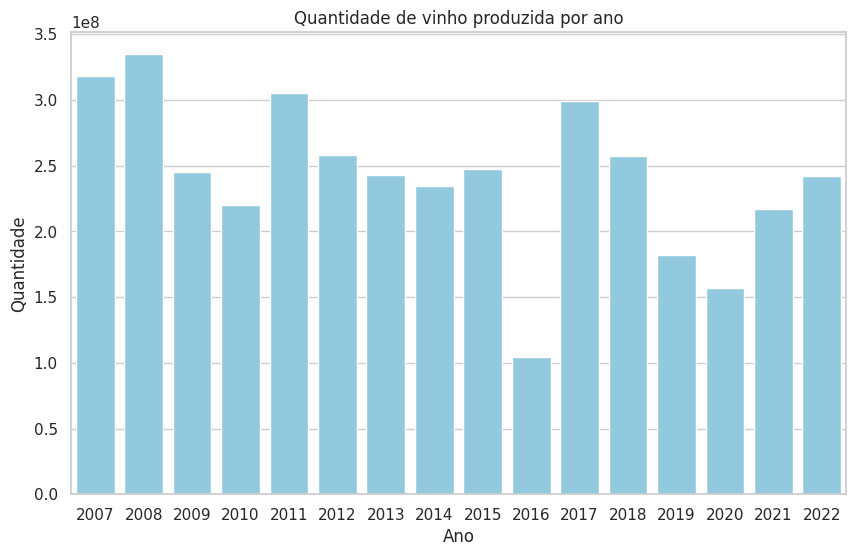

In [389]:
# Configure o estilo do Seaborn
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano
quantidade_por_ano_prod = df_filtrado.groupby('Ano')['Qtd'].sum().reset_index()

# Crie o gráfico de barras com o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano_prod, x='Ano', y='Qtd', color='skyblue')

# Configurações do gráfico
plt.title('Quantidade de vinho produzida por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Exibe o gráfico
plt.show()

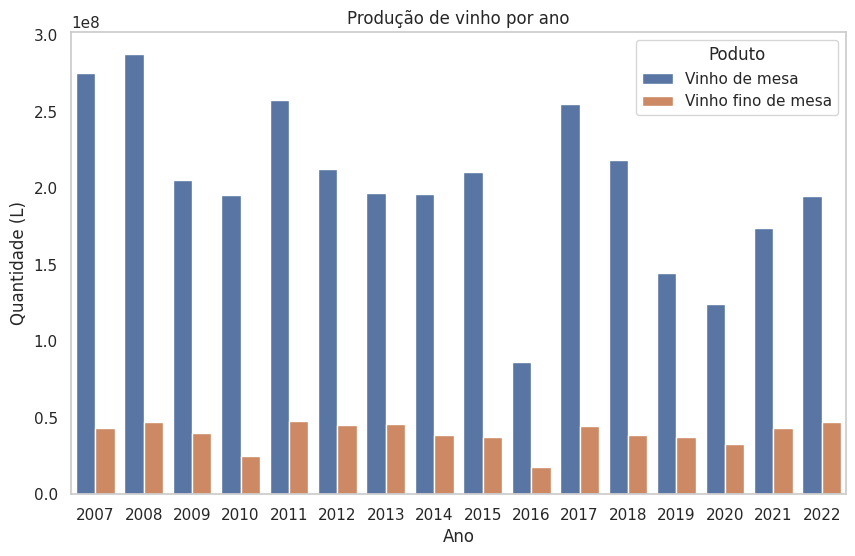

In [390]:
# Configure o estilo do Seaborn (opcional)
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano, separado por produto
quantidade_por_ano_prod = df_filtrado.groupby(['Ano', 'Produto'])['Qtd'].sum().reset_index()

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano_prod, x='Ano', y='Qtd', hue='Produto')

# Configurações do gráfico
plt.title('Produção de vinho por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')

# Exibe a legenda
plt.legend(title='Poduto', title_fontsize='12')
plt.grid(axis='y')

# Exibe o gráfico
plt.show()

In [391]:
vm_prod = df_filtrado[df_filtrado.index == 'Vinho de mesa']

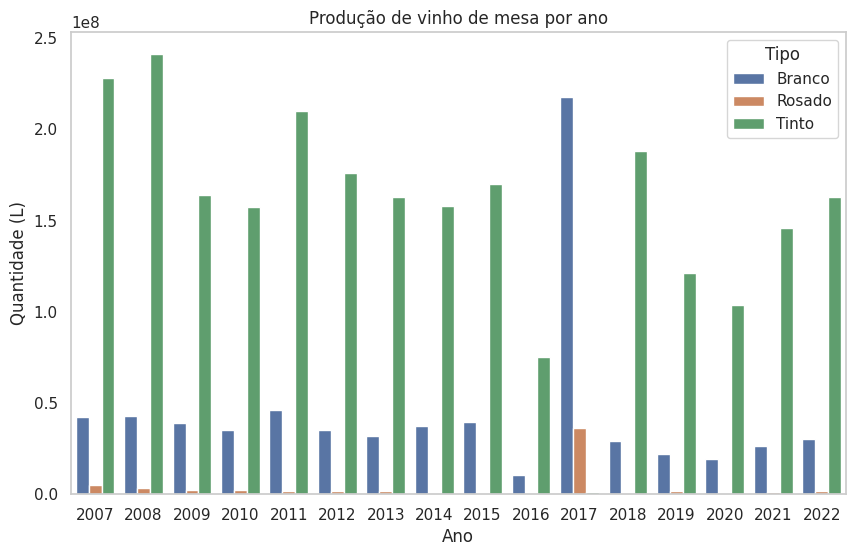

In [392]:
# Configure o estilo do Seaborn (opcional)
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano, separado por tipo
quantidade_por_ano_prod_vm = vm_prod.groupby(['Ano', 'Tipo'])['Qtd'].sum().reset_index()

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano_prod_vm, x='Ano', y='Qtd', hue='Tipo')

# Configurações do gráfico
plt.title('Produção de vinho de mesa por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')

# Exibe a legenda
plt.legend(title='Tipo', title_fontsize='12')
plt.grid(axis='y')

# Exibe o gráfico
plt.show()

#Exportação de Vinho

In [393]:
df_exp_vinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
3,4,Angola,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
df_exp_vinho= df_exp_vinho.drop(columns=["Id"], axis=0)



In [395]:
df_exp_vinho= df_exp_vinho.set_index("País")


In [396]:
df_exp_vinho.head()

,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,11,46,0,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,26,95,4,21,0,0,0,0
"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,...,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367
Angola,0,0,0,0,0,0,0,0,0,0,...,477,709,345,1065,0,0,0,0,4068,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [397]:
df_exp_vinho.columns

Index(['1970', '1970.1', '1971', '1971.1', '1972', '1972.1', '1973', '1973.1',
       '1974', '1974.1',
       ...
       '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1',
       '2022', '2022.1'],
      dtype='object', length=106)

In [398]:
colunas_com_ponto = df_exp_vinho.filter(like='.', axis=1)

colunas_com_ponto.head()

,1970.1,1971.1,1972.1,1973.1,1974.1,1975.1,1976.1,1977.1,1978.1,1979.1,...,2013.1,2014.1,2015.1,2016.1,2017.1,2018.1,2019.1,2020.1,2021.1,2022.1
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,46,0
África do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,95,21,0,0
"Alemanha, República Democrática",0,0,2630,8250,0,0,0,0,0,6500,...,265978,761653,44780,68109,87702,45382,25467,32605,6741,45367
Angola,0,0,0,0,0,0,0,0,0,2387643,...,9300,23124,17089,35390,61680,709,1065,0,0,4761
Anguilla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [399]:
exp_valor= pd.melt(colunas_com_ponto ,value_name = "Valor", var_name = "Ano"  , ignore_index=False)
exp_valor

,Ano,Valor
País,,
Afeganistão,1970.1,0
África do Sul,1970.1,0
"Alemanha, República Democrática",1970.1,0
Angola,1970.1,0
Anguilla,1970.1,0
...,...,...
Tuvalu,2022.1,0
Uruguai,2022.1,997367
Vanuatu,2022.1,0


In [400]:
exp_valor["Ano"] = exp_valor["Ano"].str.replace(".1", "")
exp_valor = exp_valor.reset_index()
exp_valor

<ipython-input-400-6b29e7776816>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  exp_valor["Ano"] = exp_valor["Ano"].str.replace(".1", "")


,País,Ano,Valor
0,Afeganistão,1970,0
1,África do Sul,1970,0
2,"Alemanha, República Democrática",1970,0
3,Angola,1970,0
4,Anguilla,1970,0
...,...,...,...
6779,Tuvalu,2022,0
6780,Uruguai,2022,997367
6781,Vanuatu,2022,0
6782,Venezuela,2022,32351


In [401]:
#colunas_sem_ponto = df_exp_vinho.filter(like= ".", axis=1)

In [402]:
colunas_com_4_digitos = [coluna for coluna in df_exp_vinho.columns if coluna.isdigit() and len(coluna) == 4]
colunas_com_4_digitos = colunas_com_4_digitos
colunas_com_4_digitos

['1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [403]:
colunas_sem_ponto = df_exp_vinho[colunas_com_4_digitos].head()

In [404]:
exp_qtd= pd.melt(colunas_sem_ponto ,value_name = "Qtd", var_name = "Ano", ignore_index=False)
exp_qtd= exp_qtd.reset_index()
exp_qtd

,País,Ano,Qtd
0,Afeganistão,1970,0
1,África do Sul,1970,0
2,"Alemanha, República Democrática",1970,0
3,Angola,1970,0
4,Anguilla,1970,0
...,...,...,...
260,Afeganistão,2022,0
261,África do Sul,2022,0
262,"Alemanha, República Democrática",2022,7630
263,Angola,2022,4068


In [405]:
coluna_paises_unicos = exp_qtd.iloc[:, exp_qtd.País].drop_duplicates()
print(coluna_paises_unicos)

IndexError: ignored

In [ ]:

exportacao = exp_valor.merge(exp_qtd, left_on= ["País", "Ano"],right_on=["País", "Ano"])
exportacao =exportacao.set_index("País")
exportacao

In [ ]:
 exportacao[exportacao['Ano'] == 2022]

In [ ]:
exportacao["Ano"]=exportacao["Ano"].astype("int64")
exportacao["Qtd"]=exportacao["Qtd"].astype("int64")

exportacao  = exportacao.loc[exportacao['Ano'] >= exportacao["Ano"].max()-15]
exportacao

In [ ]:
exportacao_2022 = exportacao[exportacao['Ano'] == 2022]
exportacao_2022 = exportacao_2022[['Ano', 'Qtd', 'Valor']]
exportacao_2022 = exportacao_2022.sort_values(by='Qtd', ascending=False)
exportacao_2022

In [ ]:
exportacao = exportacao[['Ano', 'Qtd', 'Valor']]
exportacao = exportacao.sort_values(by='Qtd', ascending=False)
exportacao.head(11)

In [ ]:
paises_relevantes = (exportacao[exportacao['Qtd'] > 1])
paises_relevantes

In [ ]:
# Configure o estilo do Seaborn
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano
quantidade_por_ano = exportacao.groupby('Ano')['Qtd'].sum().reset_index()

# Crie o gráfico de barras com o Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano, x='Ano', y='Qtd', color='skyblue')

# Configurações do gráfico
plt.title('Quantidade de vinho exportado por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

# Exibe o gráfico
plt.show()

In [ ]:
# Configure o estilo do Seaborn (opcional)
#sns.set(style="whitegrid")

# Agrupe o DataFrame por ano e some a quantidade para cada ano, separado por país
quantidade_por_ano_r = paises_relevantes.groupby(['Ano', 'País'])['Qtd'].sum().reset_index()

# Crie o gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.barplot(data=quantidade_por_ano_r, x='Ano', y='Qtd', hue='País')

# Configurações do gráfico
plt.title('Quantidade de vinho exportado por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade (L)')

# Exibe a legenda
plt.legend(title='País', title_fontsize='12')
plt.grid(axis='y')

# Exibe o gráfico
plt.show()
